In [1]:
import os as os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getcwd()

'C:\\Users\\steve'

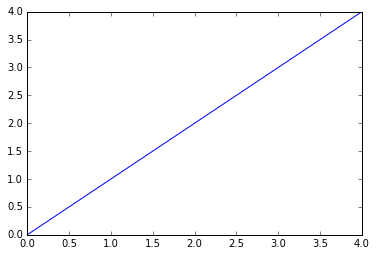

In [3]:
plot(arange(5))

In [4]:
os.chdir(r'E:\Work\04-Study\00-IT Ref\DataResources')

In [5]:
df = pd.read_csv(r'train.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

d:\program files\python\python35-32\lib\site-packages\numpy\lib\function_base.py:3835: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.shape

(614, 13)

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [11]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

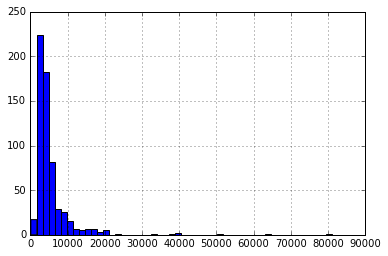

In [12]:
df['ApplicantIncome'].hist(bins=50)

d:\program files\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x99047b0>],
 'caps': [<matplotlib.lines.Line2D at 0x990d670>,
 'fliers': [<matplotlib.lines.Line2D at 0x98324d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x990dbd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9904d70>,
  <matplotlib.lines.Line2D at 0x9904e10>]}

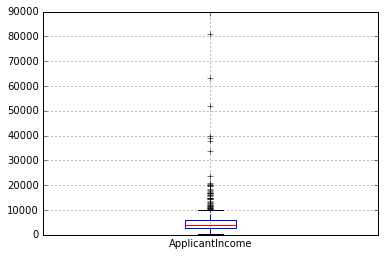

In [13]:
df.boxplot(column='ApplicantIncome')

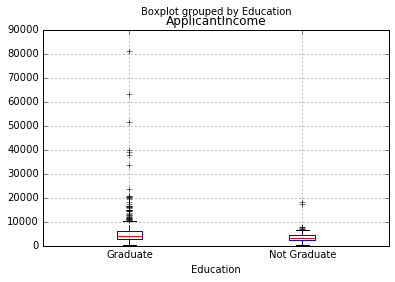

In [14]:
df.boxplot(column='ApplicantIncome', by = 'Education')

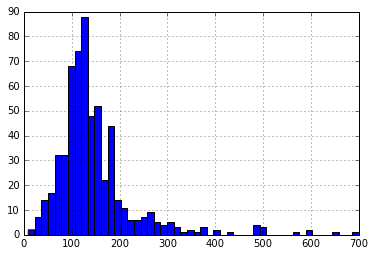

In [15]:
df['LoanAmount'].hist(bins=50)

d:\program files\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xad57610>],
 'caps': [<matplotlib.lines.Line2D at 0xad5d4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xad5def0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xad5da30>],
 'whiskers': [<matplotlib.lines.Line2D at 0xad57bd0>,
  <matplotlib.lines.Line2D at 0xad57ff0>]}

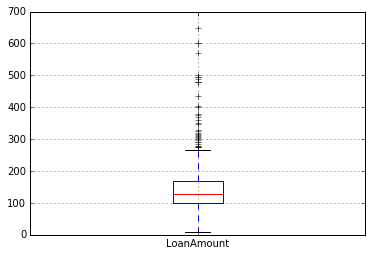

In [16]:
df.boxplot(column='LoanAmount')

In [17]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


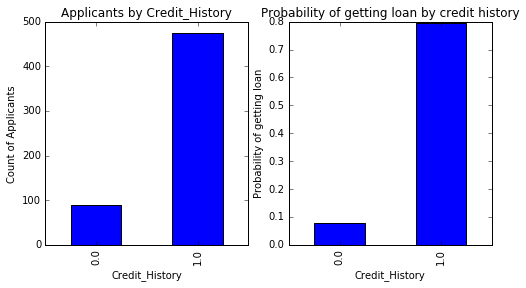

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

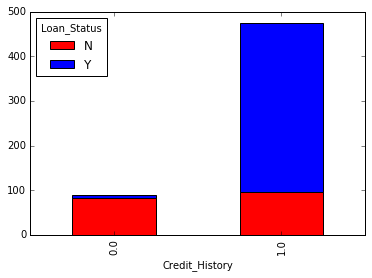

In [19]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

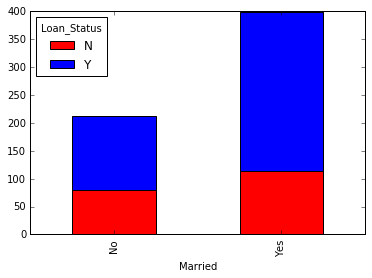

In [20]:
temp4 = pd.crosstab(df['Married'], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

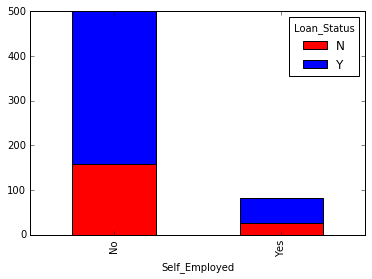

In [21]:
temp5 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

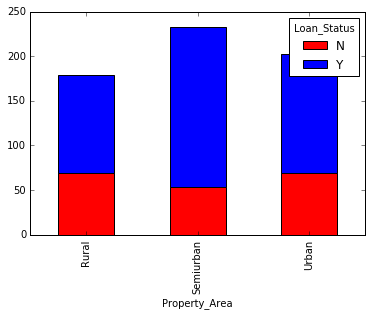

In [22]:
temp6 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [23]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

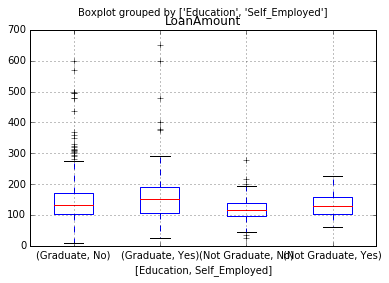

In [25]:
df.boxplot(column='LoanAmount', by=['Education','Self_Employed'])

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df['Self_Employed'].fillna('No',inplace=True)

In [28]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

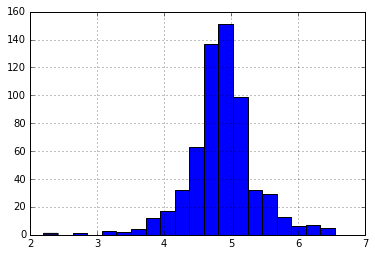

In [29]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

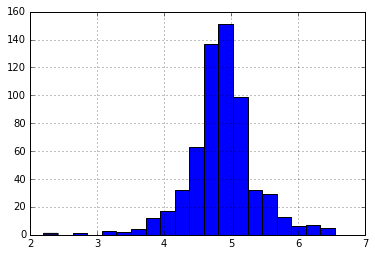

In [30]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [36]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
le.fit_transform(df['ApplicantIncome'])
# for i in var_mod:
#     df[i] = le.fit_transform(df[i])
# df.dtypes

array([376, 306, 139,  90, 381, 353,  65, 146, 269, 470, 171,  84, 150,
        24,   7, 337, 218, 208, 331,  91, 423, 380,  91, 190, 237, 450,
       116, 285,   9, 240, 279, 166, 317, 207, 469,  59,  21, 228, 279,
       239, 221,  17,  71, 261, 318, 195, 361, 374,  95, 268,  31, 154,
       286, 310, 466, 104,  45, 191, 432, 188,  84, 144,  92, 336, 279,
       367, 171, 460, 413, 290, 172,  26, 207, 324, 348, 240, 240,   5,
       166, 186, 249,  70,   8, 381, 265,  67, 186,  84, 436, 364, 133,
       392, 180, 277, 224, 407,  80,  34, 282,  15, 289, 327, 473, 312,
       247, 147, 465, 418, 243,  42, 350, 129, 214, 420, 340, 474, 166,
        54, 360, 457, 362, 279,  46, 132, 290, 232, 497, 253, 459, 386,
       493,  37, 106, 202, 332, 268, 306, 184, 478, 284, 339, 353, 411,
       102, 467,  64, 476,  11, 454, 328, 394,  89, 442,  60, 179, 501,
       381, 449, 136, 306,  25, 428, 156, 280, 444, 234, 306,  75,  56,
       430,  20, 502, 209, 366, 295, 206,  39, 358, 240,  65, 39

In [37]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64